# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Resolver acá

import requests # importo libreria para pedir acceso a la info de la API
#Formato de API:  https://api.mercadolibre.com/sites/$SITE_ID/search?q=nombre%20item

buscar = "Samsung Galaxy Flip 6"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) # ESCRIBIR URL DE MANERA DINAMICA - PUEDO CAMBIAR
#                                                                                                  QUÉ VOY A BUSCAR EN MERCADO LIBRE EN ESTE CASO
print("url:",url)

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto si marca 200

#response.text
data = response.json()
print(data)

url: https://api.mercadolibre.com/sites/MLA/search?q=Samsung%20Galaxy%20Flip%206
<Response [200]>
{'site_id': 'MLA', 'country_default_time_zone': 'GMT-03:00', 'query': 'Samsung Galaxy Flip 6', 'paging': {'total': 192, 'primary_results': 192, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLA1448202655', 'title': 'Galaxy Z Flip 6 - 512 Gb -  Edición Limitada Importado', 'condition': 'new', 'thumbnail_id': '994571-MLA78768128698_092024', 'catalog_product_id': None, 'listing_type_id': 'gold_special', 'sanitized_title': 'galaxy-z-flip-6-512-gb-edicion-limitada-importado', 'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1448202655-galaxy-z-flip-6-512-gb-edicion-limitada-importado-_JM', 'buying_mode': 'buy_it_now', 'site_id': 'MLA', 'category_id': 'MLA1055', 'domain_id': 'MLA-CELLPHONES', 'variation_id': '181573143280', 'thumbnail': 'http://http2.mlstatic.com/D_994571-MLA78768128698_092024-O.jpg', 'currency_id': 'ARS', 'order_backend': 1, 'price': 2500000, 'original_price': None, 'sal

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [2]:
# Resolver acá
import math
import pandas as pd

# Extrae la lista de resultados
results = data.get('results', []) #saco los datitos que data me tira al principio y al final
#print(results)

    # Creamos una lista de diccionarios con los títulos y precios
productos = [{'Descripción': item['title'], 'Precio': item['price']} for item in results] # Creamos una lista de diccionarios con los títulos y precios
#print(productos)

df = pd.DataFrame(productos) # Convierte lista en DataFrame
df_ordenado = df.sort_values(by='Precio', ascending=False)  # Ordenamos el DataFrame por precio en orden decreciente

print(df_ordenado)

print()
print("El minimo es: ",df_ordenado["Precio"].min()) #usamos las funciones
print("El maximo es: ",df_ordenado["Precio"].max())
print("El promedio es: ",df_ordenado["Precio"].mean())

                                          Descripción      Precio
1   Galaxy Flip 6 Olympic Edition Edicion Super Li...  6500000.00
0   Galaxy Z Flip 6 - 512 Gb -  Edición Limitada I...  2500000.00
2               Samsung Galaxy Z Flip 6 Ai 512gb 12gb  2200000.00
31  Funda Para Galaxy Z Flip 6 Ringke Fusion Magne...    64900.00
26  Funda Para Galaxy Z Flip 6 Ringke Fusion Magne...    62700.00
36  Funda Estuche Para Samsung Galaxy Z Flip 6 - A...    59999.00
35  Funda Compatible Con Galaxy Z Flip 6 Ringke Fu...    59620.00
23  Funda Para Samsung Galaxy Z Flip 6 Ringke Fusi...    55000.00
37  Funda Estuche De Cuero Para Samsung Galaxy Z F...    54999.00
12  Funda Estuche Cuero Para Samsung Galaxy Z Flip...    54999.00
38  Funda Estuche Cuero Para Samsung Galaxy Z Flip...    54999.00
43  Funda Estuche De Cuero Para Samsung Galaxy Z F...    54999.00
44  Funda Estuche De Cuero Para Samsung Galaxy Z F...    54999.00
45  Funda Estuche De Cuero Para Samsung Galaxy Z F...    54999.00
39  Funda 

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

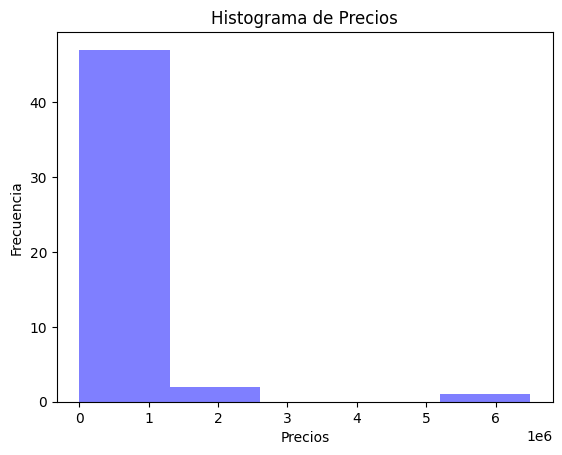

In [3]:
# Resolver acá

import matplotlib.pyplot as plt #importo la libreria para poder graficar
df_ordenado['Precio'].plot.hist(bins=5, alpha=0.5, color='blue') #paso la columna del data frame de la que quiero el histrograma

#pongo las nombres
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show() #muestro

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [4]:
# Resolver acá

import requests

# URL base de la API de Mercado Libre
base_url = "https://api.mercadolibre.com/sites/MLA/search"

# Parámetros para la consulta de celulares
params = {
    'category': 'MLA1055',  # ID de la categoría de Celulares y Teléfonos
    'limit': 2  # Número de resultados por página
}

# Realizo la solicitud
response = requests.get(base_url, params=params)

# Verifico el estado de la respuesta
if response.status_code == 200: #200 = solicitud aceptada
    data = response.json()
    productos = data['results']

    # Calculo precios
    precios = [producto['price'] for producto in productos]
    precio_maximo = max(precios)
    precio_minimo = min(precios)
    diferencia_precio = precio_maximo - precio_minimo

    print("Precio máximo:", precio_maximo)
    print("Precio mínimo:", precio_minimo)
    print("Diferencia de precio:", diferencia_precio)

print()

    # Comparar métodos de pago
for producto in productos:
        if 'installments' in producto:
            print("Métodos de pago para el producto:", producto['title'])
            print("Cuotas:", producto['installments']['quantity'])
            print("Monto por cuota:", producto['installments']['amount'])
        else:
            print("Métodos de pago no disponibles para el producto:", producto['title'])
            print()
else:
    print("Error al realizar la consulta:", response.status_code)


#Buscamos de la categoría de celulares y telefonos, seleccionamos 2 y vimos la diferencia de precio entre ambos y<
# diferencias en los métodos de pago (diferentes cuotas con diferentes montos)

Precio máximo: 329999
Precio mínimo: 279999
Diferencia de precio: 50000

Métodos de pago para el producto: Tcl 40 Se 256 Gb  Dark Gray 6 Gb Ram
Cuotas: 9
Monto por cuota: 31111
Métodos de pago para el producto: Samsung Galaxy A15 128 Gb Negro Azulado 4 Gb Ram
Cuotas: 12
Monto por cuota: 27499.92
Error al realizar la consulta: 200


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [5]:
# Resolver acá
#importar módulos
import requests 
from bs4 import BeautifulSoup 
import pandas as pd

#url de acceso al sitio de La Nación
link = "https://www.lanacion.com.ar/"

#Envío la solicitud al sitio para obtener el contenido de la página
r = requests.get(link) 
lanacion = r.content
lanacion

#Creo una variable que analice el contenido con html.parser (más organizado)
ln_parser = BeautifulSoup(lanacion, "html.parser")
ln_parser


noticias = ln_parser.find_all('article')  
lista_noticias=[] #lista vacía que se completa a medida que recolecta los links


for noticia in noticias:
    # Buscamos los enlaces dentro de cada artículo
    a_tag = noticia.find('a')
    if a_tag and a_tag.get('href'):
        href = a_tag.get('href')
        if href.startswith('/'):  # Para asegurarnos que son enlaces internos de noticias
            lista_noticias.append("https://www.lanacion.com.ar" + href)

# Imprimimos los enlaces filtrados de noticias
for link in lista_noticias:
    print(link)

#Creamos el DataFrame
link_df=pd.DataFrame(lista_noticias)
link_df

#Convertimos a archivo Excel
link_df.to_excel('noticias.xlsx', index=False)


https://www.lanacion.com.ar/el-mundo/asi-fue-la-salida-de-edmundo-gonzalez-de-venezuela-amenazado-por-la-dictadura-de-nicolas-maduro-nid08092024/
https://www.lanacion.com.ar/el-mundo/el-papelon-de-lula-da-silva-la-burla-de-maduro-y-el-camino-hacia-ningun-lado-nid07092024/
https://www.lanacion.com.ar/opinion/la-casta-que-rodea-al-presidente-nid08092024/
https://www.lanacion.com.ar/deportes/tenis/jannik-sinner-campeon-del-us-open-el-italiano-vencio-a-taylor-fritz-y-se-encumbro-tras-el-ruido-que-nid08092024/
https://www.lanacion.com.ar/sociedad/que-es-la-lipotimia-el-cuadro-que-sufrio-guillermo-francos-antes-de-ser-internado-nid08092024/
https://www.lanacion.com.ar/deportes/tenis/jannik-sinner-campeon-del-us-open-el-italiano-vencio-a-taylor-fritz-y-se-encumbro-tras-el-ruido-que-nid08092024/
https://www.lanacion.com.ar/el-mundo/desde-espana-edmundo-gonzalez-urrutia-denuncio-presiones-coacciones-y-amenazas-para-impedir-su-nid08092024/
https://www.lanacion.com.ar/politica/bandera-roja-y-mart